In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import numpy as np

In [2]:
# pandas를 이용하여 excel파일의 데이터를 가져옵니다. 321일치의 데이터가 있음을 확인해 볼 수 있습니다.
d = pd.read_excel('2020_covid19_KR_seoul.xlsx')
print(d.shape)
d

(321, 16)


,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,seoul_retail_and_recreation_percent_change_from_baseline,seoul_grocery_and_pharmacy_percent_change_from_baseline,seoul_parks_percent_change_from_baseline,seoul_transit_stations_percent_change_from_baseline,seoul_workplaces_percent_change_from_baseline,seoul_residential_percent_change_from_baseline,confirmed_new,deaths_new,recovered_new
0,2020-02-15,-4,0,3,-6,1,3,-8,0,2,-4,1,3,0,0,0
1,2020-02-16,-11,0,-31,-15,-3,4,-15,0,-33,-16,-3,4,1,0,0
2,2020-02-17,-7,-6,-17,-6,0,5,-9,-6,-17,-7,0,5,1,0,1
3,2020-02-18,-1,-3,-5,-3,2,2,1,-2,-3,-1,2,2,1,0,2
4,2020-02-19,-5,-1,14,-4,1,2,-7,-1,9,-5,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,2020-12-27,-35,-12,-8,-30,-23,11,-39,-12,22,-30,-26,12,808,11,228
317,2020-12-28,-13,13,22,-11,-12,9,-21,12,31,-15,-17,11,1045,40,1435
318,2020-12-29,-18,4,-7,-14,-13,8,-22,4,-3,-16,-18,11,1048,20,732
319,2020-12-30,-24,2,-20,-21,-16,11,-30,1,-20,-24,-20,13,967,21,836


In [3]:
# 각각의 feature들의 이름을 출력하여 봅시다.
col_names = list(d.columns)
i = 0
for n in col_names:
    print(f'feature {i}: {n}')
    i=i+1

feature 0: date
feature 1: retail_and_recreation_percent_change_from_baseline
feature 2: grocery_and_pharmacy_percent_change_from_baseline
feature 3: parks_percent_change_from_baseline
feature 4: transit_stations_percent_change_from_baseline
feature 5: workplaces_percent_change_from_baseline
feature 6: residential_percent_change_from_baseline
feature 7: seoul_retail_and_recreation_percent_change_from_baseline
feature 8: seoul_grocery_and_pharmacy_percent_change_from_baseline
feature 9: seoul_parks_percent_change_from_baseline
feature 10: seoul_transit_stations_percent_change_from_baseline
feature 11: seoul_workplaces_percent_change_from_baseline
feature 12: seoul_residential_percent_change_from_baseline
feature 13: confirmed_new
feature 14: deaths_new
feature 15: recovered_new


In [4]:
# 13번째 feature인 새로 확진된 사람의 숫자를 y(target)로 합니다.
# 우리는 1주 전의 데이터를 통해 1주 후를 예측하고자 하므로, 7번째 날짜부터의 데이터를 y로 가져오겠습니다.
y = d.iloc[7:,13].to_numpy()
print(y.shape)
y

(314,)


array([ 229,  169,  231,  144,  284,  505,  571,  813,  586,  599,  851,
        435,  467,  505,  448,  273,  164,   35,  242,  114,  110,  107,
         76,   74,   84,   93,  152,   87,  147,  162,    0,   76,  100,
        104,   91,  146,  105,   78,  125,  101,   89,   86,   94,   81,
         47,   47,   53,   39,   27,   30,   32,   25,   27,   27,   22,
         22,   18,    8,   13,    9,   11,   14,   10,   10,   10,   14,
          9,    4,    9,    6,   13,    8,    3,    2,    4,   12,   18,
         34,   35,   27,   26,   29,   27,   19,   13,   15,   13,   32,
         12,   20,   23,   25,   16,   19,   40,   79,   58,   39,   27,
         35,   38,   49,   39,   39,   51,   57,   38,   38,   50,   45,
         56,   48,   34,   36,   34,   43,   59,   49,   67,   48,   17,
         46,   51,   28,   39,   51,   62,   42,   43,   50,   54,   63,
         63,   61,   46,   44,   63,   49,   45,   35,   44,   62,   33,
         39,   61,   60,   39,   34,   26,   45,   

In [5]:
# feature1 ~ 12를 선정하여 input data X로 가져오겠습니다.
# 마지막 7일치 데이터는 target이 존재하지 않으므로, 이는 빼고 가져오도록 합니다.
X = d.iloc[:-7,1:13].to_numpy()
print(X.shape)
X

(314, 12)


array([[ -4,   0,   3, ...,  -4,   1,   3],
       [-11,   0, -31, ..., -16,  -3,   4],
       [ -7,  -6, -17, ...,  -7,   0,   5],
       ...,
       [-16,   4,   3, ..., -13, -14,   9],
       [-18,   6,   9, ..., -17, -15,  11],
       [-11,  24,   4, ..., -14, -18,  10]], dtype=int64)

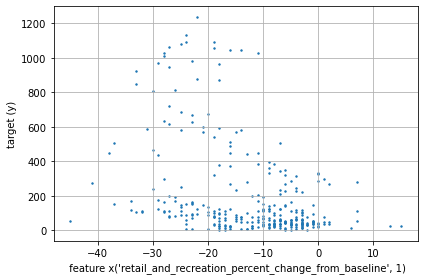

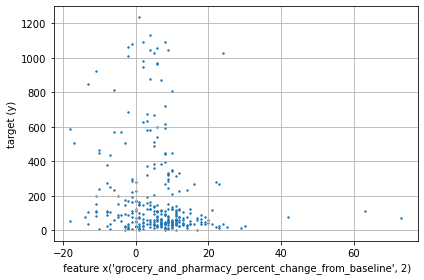

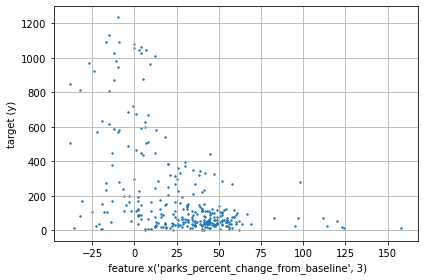

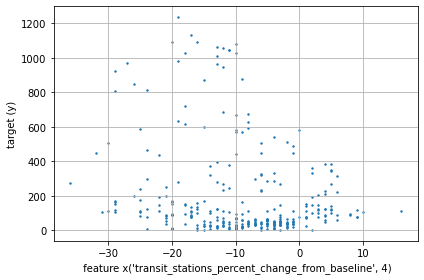

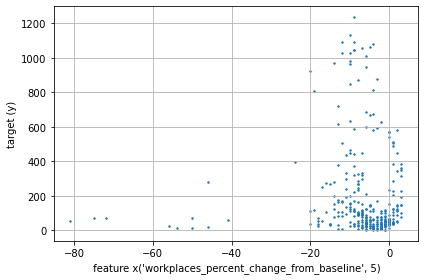

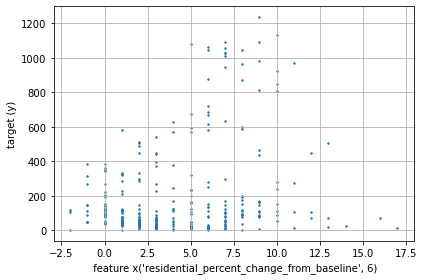

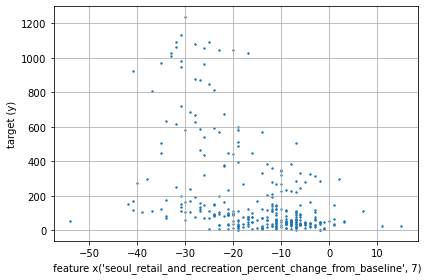

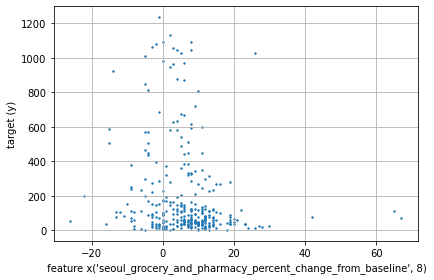

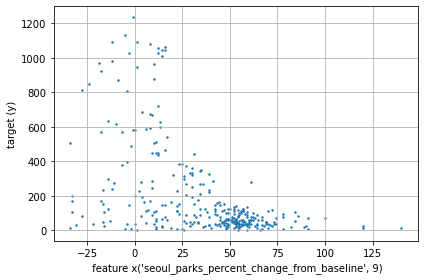

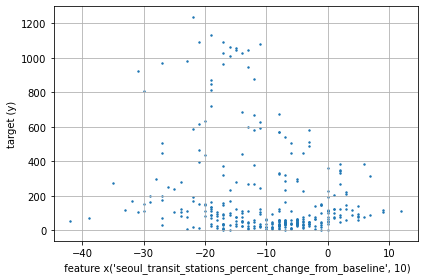

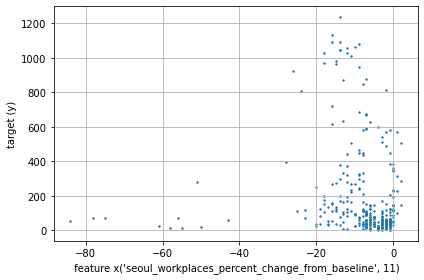

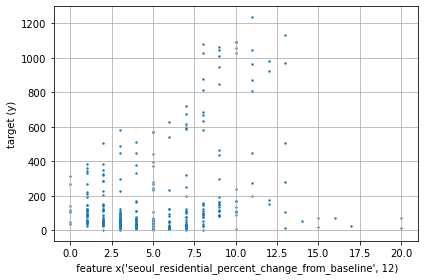

In [6]:
# 각각의 feature와 y의 관계를 그래프로 확인합니다.
for n in range(X.shape[-1]):
    plt.scatter(X[:,n],y,2)
    plt.xlabel(f' feature x{col_names[n+1], n+1}')
    plt.ylabel('target (y)')
    plt.grid('on')
    plt.tight_layout()
    plt.show()

### 파이썬코드 작성 및 실행 ###
- 불러온 데이터에 대해 학습을 진행할 수 있도록 필요한 model, loss function, optimization algorithm, data loader를 정의하고, 적절한 하이퍼파라미터를 설정하여 모델을 학습시켜 봅니다.
- 아래의 실습코드를 참고하여 네 개의 함수를 정의하고 하이퍼파라미터들을 학습결과를 보며 최적화합니다.
- 학습결과가 만족스럽지 않은 경우 input feature의 종류를 변경하여 X를 다시 구성해봅시다.
- 아래 세 개의 cell에 코드를 넣어 진행하는 것을 권장하지만 필요시 새로운 cell을 추가하여도 괜찮습니다.

In [7]:
### 필요한 함수들의 정의 (model, loss, algorithm, data loader) ###

## Defining Linear Regression Model
def linreg(X, w, b):
    return torch.matmul(X,w) + b

## Defining Squared Loss
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

## Defining optimization algorithm
def sgd(params, lr, batch_size):  
    with torch.no_grad():
        for param in params:
            if param.grad != None:
                param -= lr * param.grad/batch_size
                param.grad.zero_()
                
## Defining data loader
import random
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i +
                                                   batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [8]:
### model parameter 초기화 및 하이퍼파라미터 설정 ###

y = torch.tensor(d.iloc[7:,13].to_numpy()).float()

## 한 feature 씩 학습시켜 본 결과 feature 2와 8은 확진자 추이에 거의 영향을 주지 않음
## -> 최종 반영 데이터에서 feature 2,8 제외
X = torch.tensor(d.iloc[:-7,[1,4,5,6,7,10,12,3,9,11]].to_numpy()).float()

w = torch.zeros(10, requires_grad=True)
b = torch.zeros(1,requires_grad = True)

batch_size = 14
lr = 0.0001
num_epochs = 500

net = linreg
loss = squared_loss

In [9]:
### for loop를 이용한 model의 학습 ###
for epoch in range(num_epochs):
    for X_tr, y_tr in data_iter(batch_size, X, y):
        y_hat = net(X_tr, w, b)
        l = loss(y_hat, y_tr)  # Minibatch loss in `X_tr` and `y_tr`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        y_hat = net(X, w, b)
        train_l = loss(y_hat, y)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')


epoch 1, loss 30278.046875
epoch 2, loss 29357.468750
epoch 3, loss 29643.884766
epoch 4, loss 28194.693359
epoch 5, loss 28496.521484
epoch 6, loss 27677.468750
epoch 7, loss 27259.343750
epoch 8, loss 26487.046875
epoch 9, loss 26439.349609
epoch 10, loss 25959.269531
epoch 11, loss 25630.882812
epoch 12, loss 25916.960938
epoch 13, loss 25322.187500
epoch 14, loss 26237.617188
epoch 15, loss 25268.125000
epoch 16, loss 25712.421875
epoch 17, loss 24569.640625
epoch 18, loss 24508.626953
epoch 19, loss 24387.939453
epoch 20, loss 24227.539062
epoch 21, loss 24295.335938
epoch 22, loss 24134.427734
epoch 23, loss 24162.056641
epoch 24, loss 24647.187500
epoch 25, loss 23913.978516
epoch 26, loss 24960.501953
epoch 27, loss 23472.595703
epoch 28, loss 23419.787109
epoch 29, loss 23347.859375
epoch 30, loss 23584.263672
epoch 31, loss 23104.367188
epoch 32, loss 23091.365234
epoch 33, loss 23155.798828
epoch 34, loss 23195.589844
epoch 35, loss 22799.443359
epoch 36, loss 23202.189453
e

epoch 293, loss 18543.576172
epoch 294, loss 18704.507812
epoch 295, loss 18736.660156
epoch 296, loss 18507.003906
epoch 297, loss 18640.642578
epoch 298, loss 18709.130859
epoch 299, loss 18906.535156
epoch 300, loss 18502.125000
epoch 301, loss 18552.291016
epoch 302, loss 18492.019531
epoch 303, loss 18644.496094
epoch 304, loss 18627.015625
epoch 305, loss 18496.328125
epoch 306, loss 18575.458984
epoch 307, loss 18628.193359
epoch 308, loss 18584.990234
epoch 309, loss 18852.878906
epoch 310, loss 18489.480469
epoch 311, loss 18652.021484
epoch 312, loss 18498.556641
epoch 313, loss 18639.394531
epoch 314, loss 19308.218750
epoch 315, loss 18618.273438
epoch 316, loss 18527.656250
epoch 317, loss 18520.306641
epoch 318, loss 18644.652344
epoch 319, loss 18796.460938
epoch 320, loss 18596.228516
epoch 321, loss 18534.970703
epoch 322, loss 18445.613281
epoch 323, loss 18547.660156
epoch 324, loss 18571.363281
epoch 325, loss 18569.275391
epoch 326, loss 18716.091797
epoch 327, los

### 결과요약
- input feature 및 hyperparameter 들의 선정이 완료되어 최종 모델이 학습되면 아래와 같은 결과를 출력하여 노트북파일을 저장하고 제출합니다. 
- 결과는 아래 3가지를 반드시 포함하여 출력하도록 합니다.
    1. 314개 example들에 대한 loss의 평균, 
    2. 314개 example에 대한 label, prediction의 scatter plot, 
    3. 학습이 완료된 model의 weight들의 값

average loss: 18227.228516


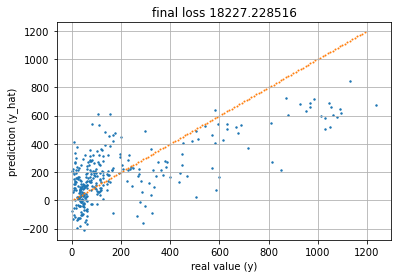

w: tensor([ 16.1532,   5.5986,  29.2294,  11.6283, -24.8027,  13.0303,  38.8807,
         -2.6529,  -0.8907, -25.5477])
b: tensor([21.5440])


In [10]:
# 학습이 완료된 모델로부터 전체 314개 데이터에 대한 average loss를 출력하고,
# real value와 prediction을 비교합니다.
# 또한, 학습된 parameter들 w를 출력하여 각각의 feature에 대한 weight를 확인합니다.
with torch.no_grad():
    y_hat = net(X, w, b)
    train_l = loss(y_hat, y)
    print(f'average loss: {float(train_l.mean()):f}')

plt.scatter(y,y_hat,2)
plt.scatter(np.arange(0,1200,10),np.arange(0,1200,10),1)
plt.grid('on')
plt.xlabel('real value (y)')

plt.ylabel('prediction (y_hat)')
plt.title(f'final loss {float(train_l.mean()):f}')
plt.show()

print('w:',w.detach())
print('b:',b.detach())